<a href="https://colab.research.google.com/github/Anagefilho/UFU_Mestrado/blob/main/NQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitness, anotando quanto as rainhas se colidem horizontalmente e verticalmente em cada indivíduo.

In [113]:
def fitnessScore(pop,new_pop):
    fit = np.zeros([pop[:,1].size, 1],dtype=int) #Criação da array do fit do tamanho da população, a matriz contém 1 coluna com pop.size linhas.
    colide_diagonal = 0
    colide_linha = 0

    for i in range(new_pop): #for para passar em toda população atual.
        colide_linha = len(pop[i]) - len(np.unique(pop[i])) # se existir números iguais na linha as rainhas estão se colidindo horizontalmente.

        x = pop[i]
        colide_diagonal = 0

        for k in range(len(x)): # k é criado para comparar a posição da peça atual com todas peças do tabuleiro.

          for j in range(len(x)): # j criado para ser comparado com k
              if j != k:
                delta_x = abs(k - j) # diferença das colunas da peça atual k com as outras peças j
                delta_y = abs(x[k] - x[j]) # diferença entre peça atual x[k] com as outras do tabuleiro x[j], diferença das linhas de cada rainha

                if(delta_x == delta_y): # quando as diferenças entre as colunas (delta_x) e a diferença entre as linhas são iguais temos uma colisão diagonal. 
                  colide_diagonal += 1

          fit[i,0] = colide_linha + colide_diagonal

    return fit

#Crossover simples e de dois pontos

In [114]:
#Cruzamento 
def crossover_single_x(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = random.randint(0, n)

    p11 = pai1[0:x]
    p12 = pai1[x:n]
    p21 = pai2[0:x]
    p22 = pai2[x:n]
    
    filho1 = np.hstack([p11,p22])
    filho2 = np.hstack([p21,p12])
    
    filho1 = Mutation(filho1) #Aplicando a mutação
    filho2 = Mutation(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos

def crossover_varios_x(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = int(n/4)
    y = int(n/2)
    
    p11 = pai1[0:x]
    p1m = pai1[x:y]
    p1m2 = pai1[y:x+y]
    p12 = pai1[x+y:n]

    p21 = pai2[0:x]
    p2m = pai2[x:y]
    p2m2 = pai2[y:x+y]
    p22 = pai2[x+y:n]

    filho1 = np.concatenate([p11,p2m,p2m2,p12])
    filho2 = np.concatenate([p21,p1m,p1m2,p22])
    
    filho1 = Mutation(filho1) #Aplicando a mutação 
    filho2 = Mutation(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos

#Mutação

# Mutações, e dupla mutação

In [ ]:
#Mutações
def Mutation(child, mutation_prob=.20): #probabilidade de mutação de 80% para dar mais diversividade ao modelo
      if(random.random() > mutation_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        return child       

      else:
        return child

def duoMutation(child, mutation_prob=.40): #probabilidade de mutação de 60% para dar mais diversividade ao modelo, porém tem a chance de ocorrer mutação dupla.
      if(random.random() > mutation_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        return child       

      elif (random.random() > 0.8):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        temp2 = child[ind[2]]

        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        child[ind[2]] = temp2
        return child


#Seleção dos melhores pais da população e função de imprimir tabuleiro

In [122]:
#Avaliação, checa fitness
def selecao_ranking(pop, new_pop):
    pop = pop[pop[:,n].argsort()][0:new_pop, :] #retorna uma lista com a população ordenada pelo fitting score
    return pop[0],pop[1] #pegamos os 2 melhores pais da população atual.


def board(pop, n): # Desenha o tabuleiro
    board = np.zeros((n,n,3))
    board += 0.5 # Inicializa o tabuleiro com cor preta em todas as casas da matriz
    board[::2, ::2] = 1 # Cor branca
    board[1::2, 1::2] = 1 # Cor branca restantes

    positions = pop[0,:n-1] # A melhor população

    fig, ax = plt.subplots()
    ax.imshow(board, interpolation='nearest')

    for y, x in enumerate(positions):
        ax.text(x, y, u'\u2655', size=15, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    
    plt.show()

#Inicialização e looping

Digite o número de rainhas: 
1000
Número da população: 
200
Número de gerações: 
999
[[ 848  449  993 ...  259  913 1196]
 [ 718  472  927 ...   82  560 1206]
 [ 654  683  358 ...  288  900 1220]
 ...
 [ 774  967  702 ...  595  959 1428]
 [ 549  351  479 ...  628  191 1432]
 [ 289  190  308 ...  117  911 1470]]
Número de rainhas:  1000
Não conseguiu achar a soluçãoa ótima, a melhor foi:
Número de gerações:  998
Melhor solução:  [848 449 993 357 769 466 972 302  26 407 440 100 729 921 486 678 750 275
 830 892 105  31 765 520 150 383 561 340 762 104 963 364 299 613 748 842
 565 430 443  55 515 924 611 901 917 487 818 337 525 595 644  56 821 158
 680 831  70   1 852 564 207 524 694  39 966 148 897 964 569 493 610 955
 601 881 281 763 699 312 586  92 869 488  12 919 355 574 192 499 837 478
 253 978 862 573 731 417 245 932 653 674 482 660 494 133 985 705 294 700
 752 841 132 400 141 378 590 745 419 845 591 961 576 929 933 517 557  48
 926 740 945 411 873 147 727 658 239 838 602 896 886 606 

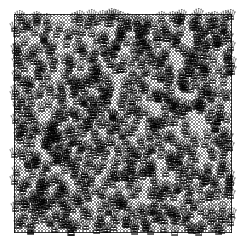

In [130]:
import sys
import random
import numpy as np 
import matplotlib.pyplot as plt

#Roteiro para criação do algoritmo genético
#Representação
#Representação por exemplo: 8 rainhas, [1 4 3 6 2 7 5 0]

# Nesse caso a fitness = número de rainhas se conflitando.  
""" 
    k = 0, j = 2
    0 - 2 = 2 
    x[k] - x[j]
    1 - 3 = 2
    colide diagonal += 1

    k = 1, j = 2
    1 - 2 = 1
    x[k] - x[j]
    4 - 3 = 1
    colide diagonal += 1

    k = 1, j = 3 
    1 - 3 = 2
    x[k] = 4, x[j] = 6
    4 - 6 = 2
    colide diagonal += 1

    fitness score = 3 nesse indivíduo.

   0 1 2 3 4 5 6 7 
0 [0 0 0 0 0 0 0 X ] 
1 [X 0 0 0 0 0 0 0 ]
2 [0 0 0 0 X 0 0 0 ]
3 [0 0 X 0 0 0 0 0 ]
4 [0 X 0 0 0 0 0 0 ]
5 [0 0 0 0 0 0 X 0 ]
6 [0 0 0 X 0 0 0 0 ]
7 [0 0 0 0 0 X 0 0 ]
"""
#Inicialização
print("Digite o número de rainhas: ")
n = int(input())
print("Número da população: ")
new_pop = int(input())
print("Número de gerações: ")
generation = int(input())

pop = np.zeros([new_pop,n],dtype=int)

for i in range(new_pop):
    pop[i, :] = np.random.permutation(n) #Inicialização da população com permutações dos númeoros de 0 até n.

#print(pop)
  
fit = fitnessScore(pop,new_pop) # calcula de todos da população atual

pop = np.hstack([pop,fit]) # adiciona na ultima linha os valores de fitness de cada indivíduo da população.

pop = pop[pop[:,n].argsort()][0:new_pop, :]
print(pop)
#Loop

for gen in range(generation):
    
    pai1, pai2 = selecao_ranking(pop, new_pop) #Seleção dos pais por meio de ranking

    filhos = crossover_varios_x(pai1, pai2) # Crossover e mutação
    #print(filhos)
    fit_filhos = fitnessScore(filhos,2)

    filhos = np.hstack([filhos,fit_filhos])

    #print(filhos)
    pop = np.vstack([pop,filhos]) # Reinserção

    pop = pop[pop[:,n].argsort()][0:new_pop, :] # Atualiza pop pegando os melhores individuos

    for i in range(new_pop): # Avaliação da população e vendo se algum indivíduo encontrou a solução ótima
      if pop[i][n] == 0: #Se fitness = 0
        print("Solução ótima encontrada!!")
        print("Número de rainhas: ", n)
        print("Número de gerações p/ encontrar geração ótima: ", gen)
        print("Melhor solução: ", pop[i, 0:n])
        print("Número de conflitos: ", pop[i][n])
        board(pop, n)

        sys.exit()

#Caso não tenha encontrado 
print("Número de rainhas: ", n)
print("Não conseguiu achar a soluçãoa ótima, a melhor foi:")
print("Número de gerações: ", gen)
print("Melhor solução: ", pop[0, 0:n])
print("Número de conflitos: ", pop[0][n])
board(pop, n) #figura

#Seleção

#Avaliação

#Reinserção
